In [ ]:
NAME = "Sumaiya Azad Isha"
ID = "22101503"
SECTION = "04"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [2]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

2.0 + 1.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵


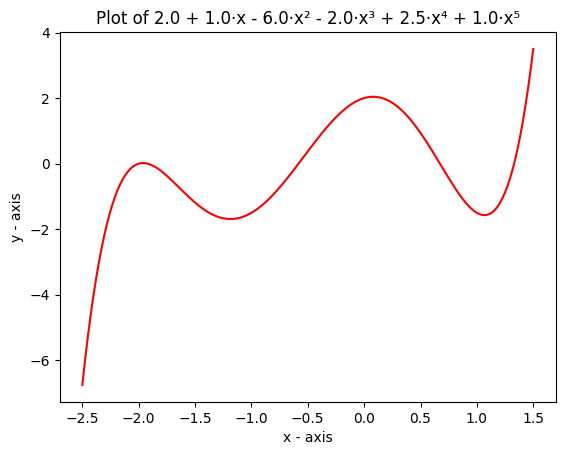

In [ ]:
#1.a This cell should plot a graph. You must use polynomial class.
coefficients = [2, 1, -6, -2, 2.5, 1]
f  = Polynomial(coefficients)
print(f)


x = np.linspace(-2.5, 1.5, 500)
y = f(x)
plt.plot(x, y, 'r', label="f(x)")
plt.title(f'Plot of {f}')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

f'(x): 1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
Actual slope of f(x) at x = 0: 1.0
Actual slope of f(x) at x = -1.18625: -9.340808105218201e-06


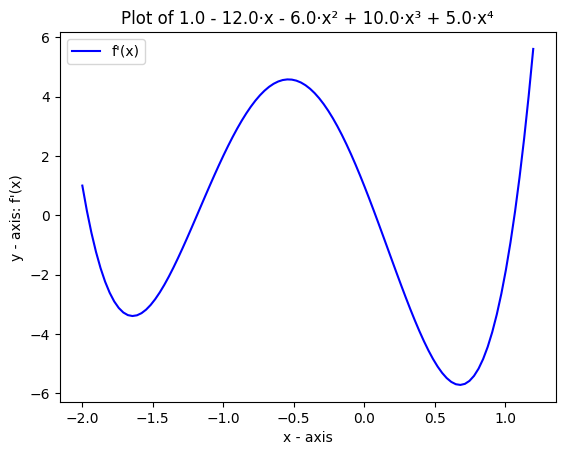

In [ ]:
#1.b This cell should print and plot a graph.
f_prime= f.deriv(1)
print(f"f'(x): {f_prime}")

x1 = 0
x2 = -1.18625
slope_at_x1 = f_prime(x1)
slope_at_x2 = f_prime(x2)
print(f"Actual slope of f(x) at x = {x1}: {slope_at_x1}")
print(f"Actual slope of f(x) at x = {x2}: {slope_at_x2}")


x_range = np.linspace(-2, 1.2, 100)
f_prime_values = f_prime(x_range)

plt.plot(x_range, f_prime_values, color='b', label="f'(x)")
plt.title(f'Plot of {f_prime}')
plt.xlabel('x - axis')
plt.ylabel("y - axis: f'(x)")
plt.legend()
plt.show()

In [ ]:
#1.c This cell should print
h=0.1
x_vals = [0, -1.18625]
def forward_diff(f, x, h):
    return ((f(x + h) - f(x)) / h)

forward_slope = [forward_diff(f, x, h) for x in x_vals]
print(f"Forward differentiation slope at x = 0: {forward_slope[0]}")
print(f"Forward differentiation slope at x = -1.18625: {forward_slope[1]}")


Forward differentiation slope at x = 0: 0.3826000000000018
Forward differentiation slope at x = -1.18625: 0.5520088838012782


In [ ]:
#1.d This cell should print
h=0.1
x_vals = [0, -1.18625]
def backward_diff(f, x, h):
    return ((f(x) - f(x - h)) / h)

backward_slope = [backward_diff(f, x, h) for x in x_vals]
print(f"Backward differentiation slope at x = 0: {backward_slope[0]}")
print(f"Backward differentiation slope at x = -1.18625: {backward_slope[1]}")

Backward differentiation slope at x = 0: 1.5776000000000012
Backward differentiation slope at x = -1.18625: -0.5476397529174859


In [ ]:
#1.e This cell should print
h=0.1
x_vals = [0, -1.18625]
def central_diff(f, x, h):
    return ((f(x + h) - f(x - h)) / (2 * h))

central_slope = [central_diff(f, x, h) for x in x_vals]
print(f"Central differentiation slope at x = 0: {central_slope[0]}")
print(f"Central differentiation slope at x = -1.18625: {central_slope[1]}")

Central differentiation slope at x = 0: 0.9801000000000015
Central differentiation slope at x = -1.18625: 0.002184565441896158


In [ ]:
#1.f This cell should show a table
def compare(f, f_prime, h_values, x_vals):
    Result = {'h' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}

    for h in h_values:
        for x in x_vals:
            Result['h'].append(h)
            Result['Actual'].append(f_prime(x))
            Result['FD'].append(forward_diff(f, x, h))
            Result['BD'].append(backward_diff(f, x, h))
            Result['CD'].append(central_diff(f, x, h))
            Result['FD Error'].append(abs(forward_diff(f, x, h) - f_prime(x)))
            Result['BD Error'].append(abs(backward_diff(f, x, h) - f_prime(x)))
            Result['CD Error'].append(abs(central_diff(f, x, h)- f_prime(x)))

    return pd.DataFrame(Result)

h_values = [0.1]
x_vals = [0, -1.18625]
compare(f, f_prime, h_values, x_vals).head()



,h,Actual,FD,BD,CD,FD Error,BD Error,CD Error
0,0.1,1.000000,0.382600,1.57760,0.980100,0.617400,0.57760,0.019900
1,0.1,-0.000009,0.552009,-0.54764,0.002185,0.552018,0.54763,0.002194


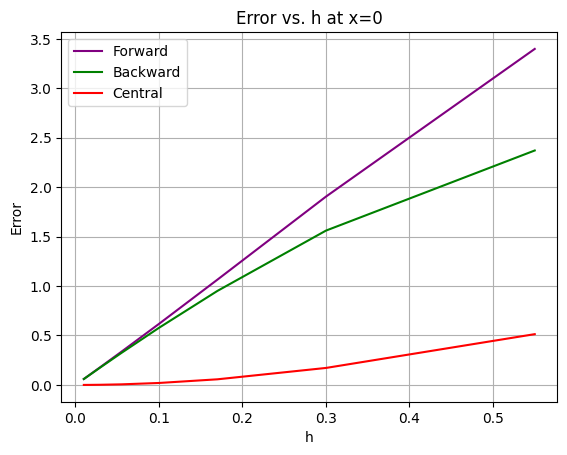

In [ ]:
#1.f This cell should show a table
h_values = np.array([0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01])
x = [0]
result = compare(f, f_prime, h_values, x)

plt.plot(h_values, result['FD Error'], label='Forward', color='purple')
plt.plot(h_values, result['BD Error'], label='Backward', color='green')
plt.plot(h_values, result['CD Error'], label='Central', color='red')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs. h at x=0')
plt.legend()
plt.grid(True)
plt.show()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [ ]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson extrapolation"

def dh(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

def richardson_extrapolation(f, h, x):
    return (4 * dh(f, h/2, x) - dh(f, h, x)) / 3


In [ ]:
#2b. This cell should print
x_values = [0, -1.18625]
h = 0.1
for x in x_values:
  slope = richardson_extrapolation(f, h, x)
  print(f"The slope of f(x) at x = {x} using Richardson Extrapolation is: {slope:.6f}")

The slope of f(x) at x = 0 using Richardson Extrapolation is: 0.999975
The slope of f(x) at x = -1.18625 using Richardson Extrapolation is: -0.000034


In [ ]:
#2c.This cell should print
def compare1(f, f_prime, h_values, x_vals):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}

    for h in h_values:
        for x in x_vals:
            Result['x'].append(x)
            Result['Actual'].append(f_prime(x))
            Result['RE'].append(richardson_extrapolation(f, h, x))
            Result['FD'].append(forward_diff(f, x, h))
            Result['BD'].append(backward_diff(f, x, h))
            Result['CD'].append(central_diff(f, x, h))
            Result['FD Error'].append(abs(forward_diff(f, x, h) - f_prime(x)))
            Result['BD Error'].append(abs(backward_diff(f, x, h) - f_prime(x)))
            Result['CD Error'].append(abs(central_diff(f, x, h)- f_prime(x)))
            Result['RE Error'].append(abs(richardson_extrapolation(f, h, x) - f_prime(x)))

    return pd.DataFrame(Result)

h_values = [0.1]
x_vals = [0, -1.18625]
compare1(f, f_prime, h_values, x_vals).head()

,x,Actual,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,0.617400,0.57760,0.019900,0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,0.54763,0.002194,0.000025


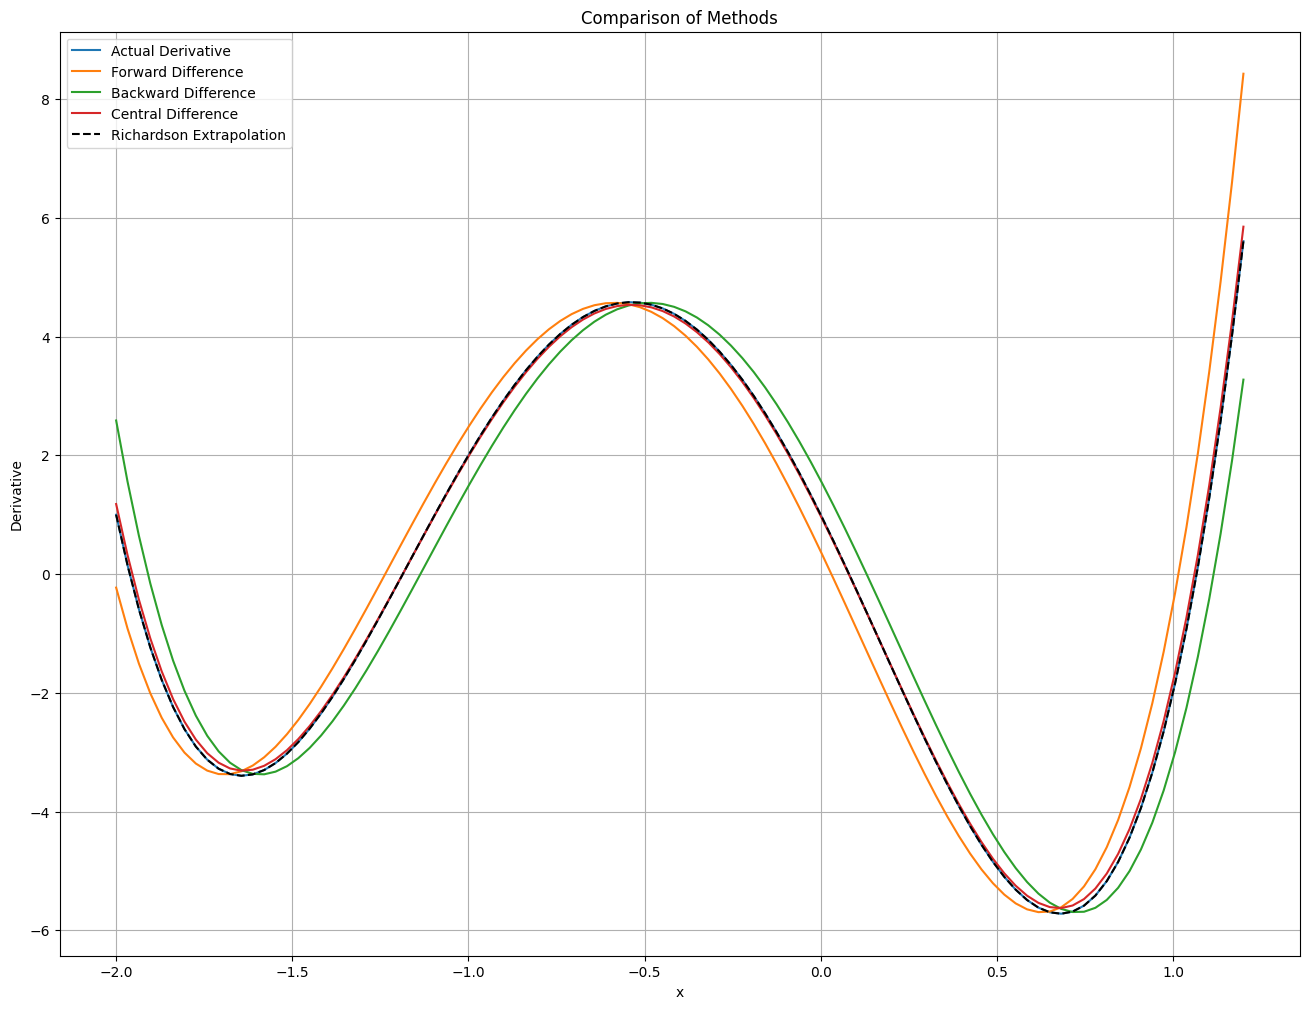

In [ ]:
#2.d This cell should plot a graph.
h=0.1
x_plot = np.linspace(-2, 1.2, 100)
Actual = f_prime(x_plot)
FD = forward_diff(f, x_plot, h)
BD = backward_diff(f, x_plot, h)
CD = central_diff(f, x_plot, h)
RE = richardson_extrapolation(f, h,x_plot)

plt.figure(figsize=(16, 12))
plt.plot(x_plot, Actual, label='Actual Derivative')
plt.plot(x_plot, FD, label='Forward Difference')
plt.plot(x_plot, BD, label='Backward Difference')
plt.plot(x_plot, CD, label='Central Difference')
plt.plot(x_plot, RE, label='Richardson Extrapolation',linestyle='--',color='Black')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.title('Comparison of Methods')
plt.legend()
plt.grid(True)
plt.show()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [3]:
#3a_i This cell should print
coefficients = [-10, -9.5, 2, -1/13]
f  = Polynomial(coefficients)
print(f'f(x) = {f}')

def check_intervals(func, intervals):
    root_check ={}
    root_intervals = []
    for interval in intervals:
        a, b = interval
        if func(a) * func(b) < 0:
            root_check[interval] = 'Root exists'
            root_intervals.append(interval)
        else:
            root_check[interval] = 'No root'
    return root_intervals,root_check


intervals = [(-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30)]
root_intervals,root_check = check_intervals(f, intervals)
print(root_check)


f(x) = -10.0 - 9.5·x + 2.0·x² - 0.07692308·x³
{(-20, -10): 'No root', (-10, 0): 'Root exists', (0, 10): 'Root exists', (10, 20): 'Root exists', (20, 30): 'No root'}


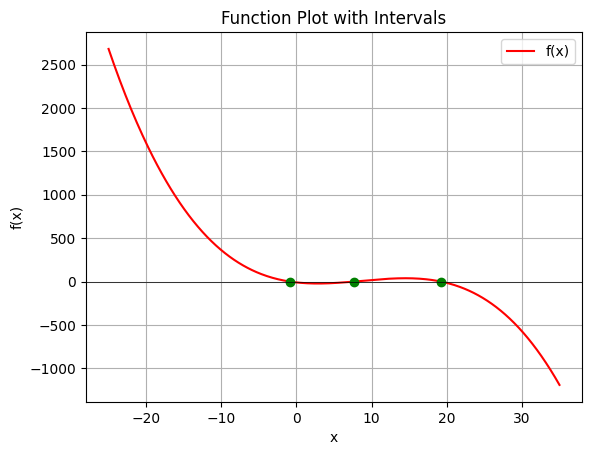

In [4]:
#3a_ii This cell should plot a graph.
x = np.linspace(-25, 35, 400)
y = f(x)

plt.plot(x, y, label='f(x)',color='Red')
roots = f.roots()
plt.plot(roots, [0.0] * len(roots), 'go')

plt.axhline(0, color='black', linewidth=0.5)

plt.title('Function Plot with Intervals')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [5]:
#3b This cell should print
intervals = [(-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30)]
def bisection(func, a, b, error_bound=1e-6):
    list_a = [a]
    list_b = [b]
    list_m = [(a + b) / 2]
    list_f = [func(list_m[0])]

    x = 0
    y = 0
    val = float('inf')

    while val >= error_bound:
        if func(list_a[x]) * func(list_m[x]) < 0:
            list_a.append(list_a[x])
            list_b.append(list_m[x])
        elif func(list_b[x]) * func(list_m[x]) < 0:
            list_a.append(list_m[x])
            list_b.append(list_b[x])

        m = (list_a[x + 1] + list_b[x + 1]) / 2
        root = m
        list_f.append(func(m))
        list_m.append(m)

        if x > 0:
            val = abs(list_m[y + 1] - list_m[y]) / abs(list_m[y])
        x += 1
        y += 1

    return root

roots = []
for interval in root_intervals:
    a, b = interval
    if f(a) * f(b) < 0:
        root = bisection(f, a, b)
        roots.append(root)
        print(f"Root in interval {interval}: {root}")


Root in interval (-10, 0): -0.8829361200332642
Root in interval (0, 10): 7.658982276916504
Root in interval (10, 20): 19.223957061767578


c. Plot the f(x) along with the roots to check if your method is working correctly.

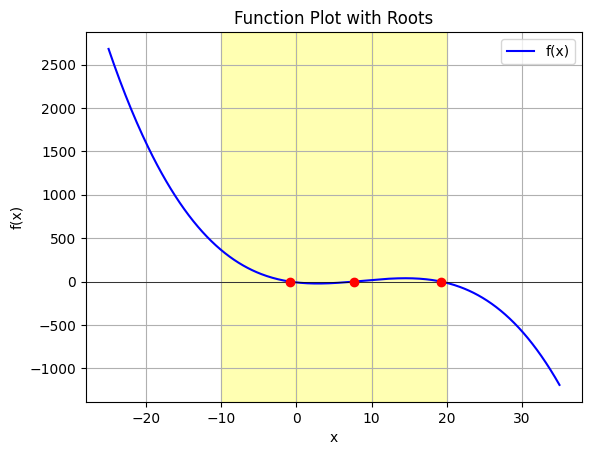

In [6]:
#3c This cell plot a graph.
x = np.linspace(-25, 35, 400)
y = f(x)

plt.plot(x, y, label='f(x)',color='Blue')
plt.axhline(0, color='black', linewidth=0.5)

for interval in root_intervals:
    plt.axvspan(interval[0], interval[1], color='yellow', alpha=0.3)

for root in roots:
    plt.plot(root, f(root), 'ro')

plt.title('Function Plot with Roots')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [7]:
#4a This cell should print
co_eff = [2, 0.5, -6, -2, 2.5, 1]
f = Polynomial(co_eff)
print(f)
print("Roots of f(x):", f.roots())

2.0 + 0.5·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵
Roots of f(x): [-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


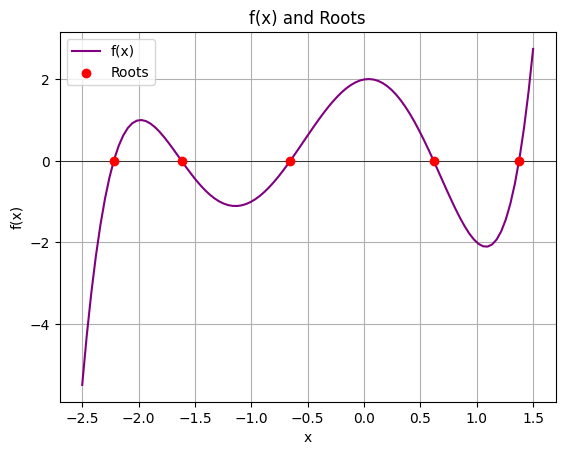

In [8]:
#4b This cell should print plot a graph
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
plt.plot(x, y, label="f(x)", color='purple')
plt.scatter(f.roots(), f(f.roots()), color='red', label="Roots", zorder=5)

plt.axhline(0, color='black',linewidth=0.5)
plt.title("f(x) and Roots")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#4c This cell should print
g1 = Polynomial([-1, 0, 3, 1, -1.25, -0.5])

def g1_prime(x):
    g1_deri = g1.deriv(1)
    return g1_deri(x)

x = np.linspace(-2.5, 1.5, 100)
g1_prime_vals = g1_prime(x)
lambda_val = np.max(np.abs(g1_prime_vals))

print("Lipschitz constant (λ) for g1(x):", lambda_val)

Lipschitz constant (λ) for g1(x): 15.78125


In [10]:
#4d This cell should print
a1 = 0.8
g1_a = []
g1_a.append(a1)
results = {'x': [], 'g(x)': []}

for i in range(20):
  results['x'].append(a1)
  results['g(x)'].append(g1(a1))
  val1 = g1(a1)
  g1_a.append(val1)
  a1 = val1

pd.DataFrame(results).head(20)

,x,g(x)
0,0.800000,0.756160
1,0.756160,0.615421
2,0.615421,0.145868
3,0.145868,-0.933662
4,-0.933662,0.206145
5,0.206145,-0.866196
6,-0.866196,0.141114
7,0.141114,-0.937974
8,-0.937974,0.209626
9,0.209626,-0.861576


In [11]:
#4e This cell have no outputs
def g2(x):
    p = Polynomial([2, 0.5, 0, -2, 2.5, 1])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2, -0.5, 6, 2, 0, -1])
    return np.power(p(x)/2.5,1.0/4.0)

def g4(x):
    p = Polynomial([-2, -0.5, 6, 2, -2.5])
    return np.power(p(x), 1.0/5.0)

g5 = Polynomial([2, 1.5, -6, -2, 2.5, 1])

In [12]:
#4f This cell should print
a1 = 0.80
g1_a = []
g1_a.append(a1)

a2 = 0.80
g2_a = []
g2_a.append(a2)

a3 = 0.80
g3_a = []
g3_a.append(a3)

a4 = 0.80
g4_a = []
g4_a.append(a4)

a5 = 0.80
g5_a = []
g5_a.append(a5)


for i in range(20):
  val1 = g1(a1)
  g1_a.append(val1)
  a1 = val1
  val2 = g2(a2)
  g2_a.append(val2)
  a2 = val2
  val3 = g3(a3)
  g3_a.append(val3)
  a3 = val3
  val4 = g4(a4)
  g4_a.append(val4)
  a4 = val4
  val5 = g5(a5)
  g5_a.append(val5)
  a5 = val5

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a, 'g4(x)':g4_a, 'g5(x)':g5_a}))

       g1(x)     g2(x)    g3(x))     g4(x)          g5(x)
0   0.800000  0.800000  0.800000  0.800000   8.000000e-01
1   0.756160  0.674250  0.961461  1.075654  -3.123200e-01
2   0.615421  0.629830  1.126203  1.288144   1.028002e+00
3   0.145868  0.620179  1.249411  1.362956  -1.031410e+00
4  -0.933662  0.618412  1.320336  1.374225  -2.073532e+00
5   0.206145  0.618100  1.353509  1.375189  -1.193375e+00
6  -0.866196  0.618046  1.367069  1.375262  -2.285772e+00
7   0.141114  0.618036  1.372244  1.375267  -3.043984e+00
8  -0.937974  0.618034  1.374162  1.375268  -4.845507e+01
9   0.209626  0.618034  1.374865  1.375268  -2.531187e+08
10 -0.861576  0.618034  1.375121  1.375268  -1.039014e+42
11  0.135970  0.618034  1.375214  1.375268 -1.210894e+210
12 -0.942473  0.618034  1.375248  1.375268           -inf
13  0.213167  0.618034  1.375261  1.375268            NaN
14 -0.856795  0.618034  1.375265  1.375268            NaN
15  0.130560  0.618034  1.375267  1.375268            NaN
16 -0.947019  

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:756: RuntimeWarning: overflow encountered in scalar multiply
  c0 = c[-i] + c0*x
/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:754: RuntimeWarning: invalid value encountered in scalar multiply
  c0 = c[-1] + x*0


<ipython-input-11-b9fc068b8b3d>:8: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5,1.0/4.0)
<ipython-input-11-b9fc068b8b3d>:12: RuntimeWarning: invalid value encountered in power
  return np.power(p(x), 1.0/5.0)


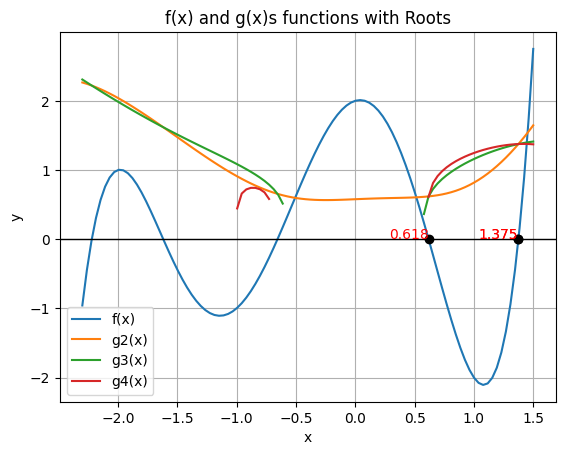

In [13]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
# Ignoring g1 and g5 as no actual roots were found
x_vals = np.linspace(-2.3, 1.5, 100)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.plot(x_vals, g2(x_vals), label='g2(x)')
plt.plot(x_vals, g3(x_vals), label='g3(x)')
plt.plot(x_vals, g4(x_vals), label='g4(x)')


if len(g1_a) > 0:
    root = np.array([g2_a[len(g1_a)-1], g3_a[len(g2_a)-1], g4_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ko')

for r in root:
    plt.text(r, f(r), f'{r:.3f}', fontsize=10, color='red', ha='right')

plt.axhline(0, color='black',linewidth=1)
plt.title("f(x) and g(x)s functions with Roots")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
